In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re
from textblob import TextBlob
from wordcloud import WordCloud

In [2]:
df=pd.read_csv('tweets.csv')

In [3]:
df.head()

,author,content,country,date_time,id,language,latitude,longitude,number_of_likes,number_of_shares
0,katyperry,Is history repeating itself...?#DONTNORMALIZEH...,NaN,12/01/2017 19:52,8.196330e+17,en,NaN,NaN,7900,3472
1,katyperry,@barackobama Thank you for your incredible gra...,NaN,11/01/2017 08:38,8.191010e+17,en,NaN,NaN,3689,1380
2,katyperry,Life goals. https://t.co/XIn1qKMKQl,NaN,11/01/2017 02:52,8.190140e+17,en,NaN,NaN,10341,2387
3,katyperry,Me right now 🙏🏻 https://t.co/gW55C1wrwd,NaN,11/01/2017 02:44,8.190120e+17,en,NaN,NaN,10774,2458
4,katyperry,SISTERS ARE DOIN' IT FOR THEMSELVES! 🙌🏻💪🏻❤️ ht...,NaN,10/01/2017 05:22,8.186890e+17,en,NaN,NaN,17620,4655


In [4]:
df=df.drop(['id','latitude','longitude','date_time'],axis='columns')

In [5]:
df.head()

,author,content,country,language,number_of_likes,number_of_shares
0,katyperry,Is history repeating itself...?#DONTNORMALIZEH...,NaN,en,7900,3472
1,katyperry,@barackobama Thank you for your incredible gra...,NaN,en,3689,1380
2,katyperry,Life goals. https://t.co/XIn1qKMKQl,NaN,en,10341,2387
3,katyperry,Me right now 🙏🏻 https://t.co/gW55C1wrwd,NaN,en,10774,2458
4,katyperry,SISTERS ARE DOIN' IT FOR THEMSELVES! 🙌🏻💪🏻❤️ ht...,NaN,en,17620,4655


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52542 entries, 0 to 52541
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   author            52542 non-null  object
 1   content           52542 non-null  object
 2   country           36 non-null     object
 3   language          52542 non-null  object
 4   number_of_likes   52542 non-null  int64 
 5   number_of_shares  52542 non-null  int64 
dtypes: int64(2), object(4)
memory usage: 2.4+ MB


In [7]:
df=df.drop('country',axis=1)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52542 entries, 0 to 52541
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   author            52542 non-null  object
 1   content           52542 non-null  object
 2   language          52542 non-null  object
 3   number_of_likes   52542 non-null  int64 
 4   number_of_shares  52542 non-null  int64 
dtypes: int64(2), object(3)
memory usage: 2.0+ MB


In [9]:
df.author.unique()

array(['katyperry', 'justinbieber', 'taylorswift13', 'BarackObama',
       'rihanna', 'YouTube', 'ladygaga', 'TheEllenShow', 'Twitter',
       'jtimberlake', 'KimKardashian', 'britneyspears', 'Cristiano',
       'selenagomez', 'cnnbrk', 'jimmyfallon', 'ArianaGrande', 'shakira',
       'instagram', 'ddlovato'], dtype=object)

In [10]:
df.content

0        Is history repeating itself...?#DONTNORMALIZEH...
1        @barackobama Thank you for your incredible gra...
2                      Life goals. https://t.co/XIn1qKMKQl
3                  Me right now 🙏🏻 https://t.co/gW55C1wrwd
4        SISTERS ARE DOIN' IT FOR THEMSELVES! 🙌🏻💪🏻❤️ ht...
                               ...                        
52537                 Life couldn't be better right now. 😊
52538    First Monday back in action. I'd say 21.6 mile...
52539    Crime shows, buddy, snuggles = the perfect Sun...
52540                            ❄️ http://t.co/sHCFdPpGPa
52541                        ❤️❄️✈️ http://t.co/ixmB5lv17Z
Name: content, Length: 52542, dtype: object

In [20]:
# CLean content

def cleanContent(text):
    text=re.sub(r'@[A-Za-z0-9+]','',text) # Remove @
    text=re.sub(r'#','',text) #Remove #
    
    #Remove URLs
    text = re.sub('http[s]?://(?:[a-zA-Z]|[0-9]|[$-_@.&+]|[!*\(\),]|(?:%[0-9a-fA-F][0-9a-fA-F]))+', '', text, flags=re.MULTILINE)

    #Remove Emojis
    emoj = re.compile("["
        u"\U0001F600-\U0001F64F"  # emoticons
        u"\U0001F300-\U0001F5FF"  # symbols & pictographs
        u"\U0001F680-\U0001F6FF"  # transport & map symbols
        u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
        u"\U00002500-\U00002BEF"  # chinese char
        u"\U00002702-\U000027B0"
        u"\U00002702-\U000027B0"
        u"\U000024C2-\U0001F251"
        u"\U0001f926-\U0001f937"
        u"\U00010000-\U0010ffff"
        u"\u2640-\u2642" 
        u"\u2600-\u2B55"
        u"\u200d"
        u"\u23cf"
        u"\u23e9"
        u"\u231a"
        u"\ufe0f"  # dingbats
        u"\u3030"
                      "]+", re.UNICODE)
    return re.sub(emoj, '', text)

In [21]:
df=df[df.language=='en']

In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 46934 entries, 0 to 52539
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   author            46934 non-null  object
 1   content           46934 non-null  object
 2   language          46934 non-null  object
 3   number_of_likes   46934 non-null  int64 
 4   number_of_shares  46934 non-null  int64 
dtypes: int64(2), object(3)
memory usage: 2.1+ MB


In [24]:
# Dividing tweets on the basis of author

df['content']=df.content.apply(cleanContent)
df.head()

,author,content,language,number_of_likes,number_of_shares
0,katyperry,Is history repeating itself...?DONTNORMALIZEHATE,en,7900,3472
1,katyperry,arackobama Thank you for your incredible grace...,en,3689,1380
2,katyperry,Life goals.,en,10341,2387
3,katyperry,Me right now,en,10774,2458
4,katyperry,SISTERS ARE DOIN' IT FOR THEMSELVES!,en,17620,4655


In [41]:
# Make distinct DataFrames for different users

user_dataframes={}

for key in df.author.unique():
    user_dataframes[key]=pd.DataFrame(df[df.author==key]['content'],columns=['content'])


In [42]:
authors=df.author.unique()
authors

array(['katyperry', 'justinbieber', 'taylorswift13', 'BarackObama',
       'rihanna', 'YouTube', 'ladygaga', 'TheEllenShow', 'Twitter',
       'jtimberlake', 'KimKardashian', 'britneyspears', 'Cristiano',
       'selenagomez', 'cnnbrk', 'jimmyfallon', 'ArianaGrande', 'shakira',
       'instagram', 'ddlovato'], dtype=object)

In [43]:
user_dataframes['Twitter']

,content
21246,shley_ardinger We shall dub thee: “Meme Master...
21248,shley_ardinger Meme of the week goes to you.
21249,aggyTheBrave What a time it’s been. Happy 10 y...
21250,tsqueenlena You got a pet giraffe?!
21251,izahmmed Or is it...
...,...
23531,Twitter acquires GeoAPI—location awareness to ...
23532,"If you use a Palm Pre, here are some reviews o..."
23533,Look! A shiny new blog design. Thanks l!
23534,Update on the DNS issue of last night:


In [59]:
# user_dataframes['Twitter'].content.apply(lambda text:TextBlob(text).sentiment.subjectivity)

# Add Subjectivity and Polarity

for i,key in enumerate(user_dataframes):
    user_dataframes[key]['Subjectivity']=user_dataframes[key].content.apply(lambda text:TextBlob(text).sentiment.subjectivity)
    user_dataframes[key]['Polarity']=user_dataframes[key].content.apply(lambda text:TextBlob(text).sentiment.polarity)
    

In [80]:
def plotWordCloud(key):
    plt.figure(figsize=(20,10))
    words=''.join([corpus for corpus in user_dataframes[key].content])
    wordCloud=WordCloud(width=500,height=300,random_state=30,max_font_size=120).generate(words)

    plt.imshow(wordCloud,interpolation='bilinear')
    plt.axis('off')
    plt.show()

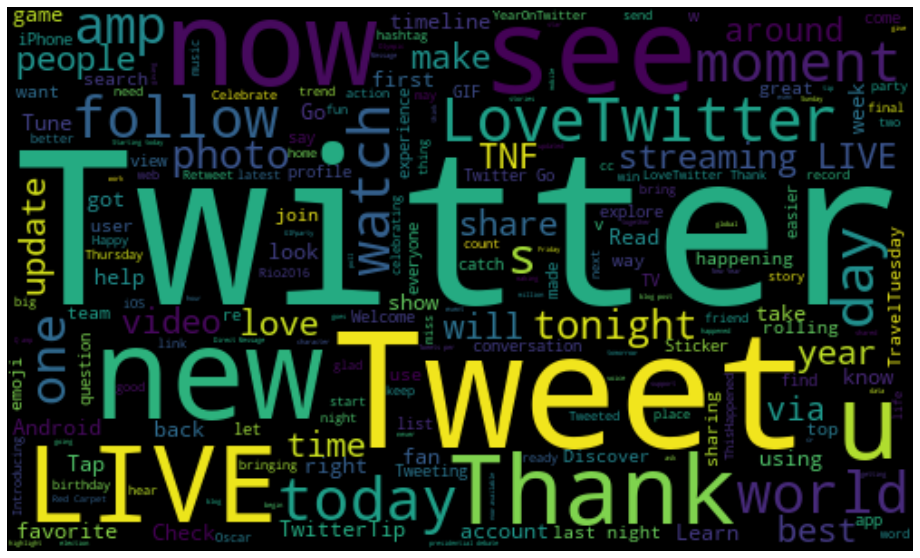

In [81]:
plotWordCloud('Twitter')

In [74]:
user_dataframes.keys()

dict_keys(['katyperry', 'justinbieber', 'taylorswift13', 'BarackObama', 'rihanna', 'YouTube', 'ladygaga', 'TheEllenShow', 'Twitter', 'jtimberlake', 'KimKardashian', 'britneyspears', 'Cristiano', 'selenagomez', 'cnnbrk', 'jimmyfallon', 'ArianaGrande', 'shakira', 'instagram', 'ddlovato'])

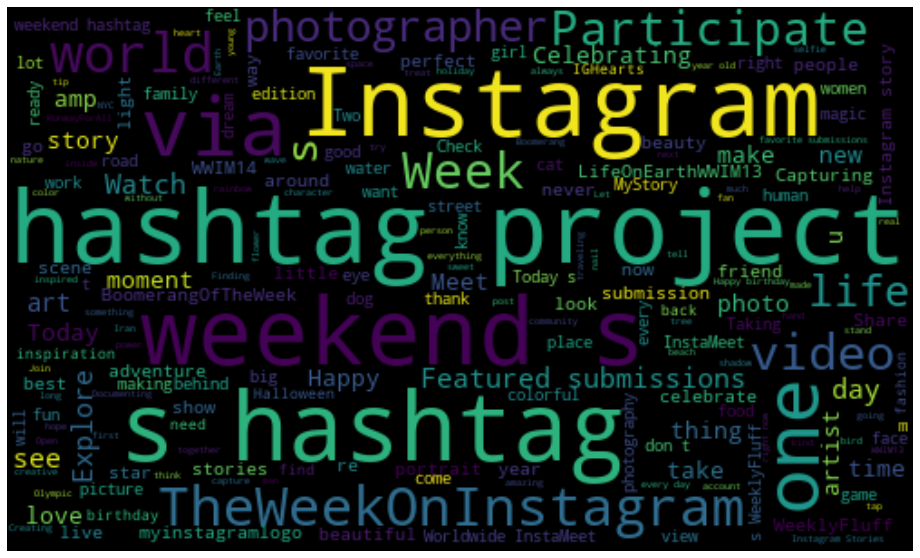

In [82]:
plotWordCloud('instagram')

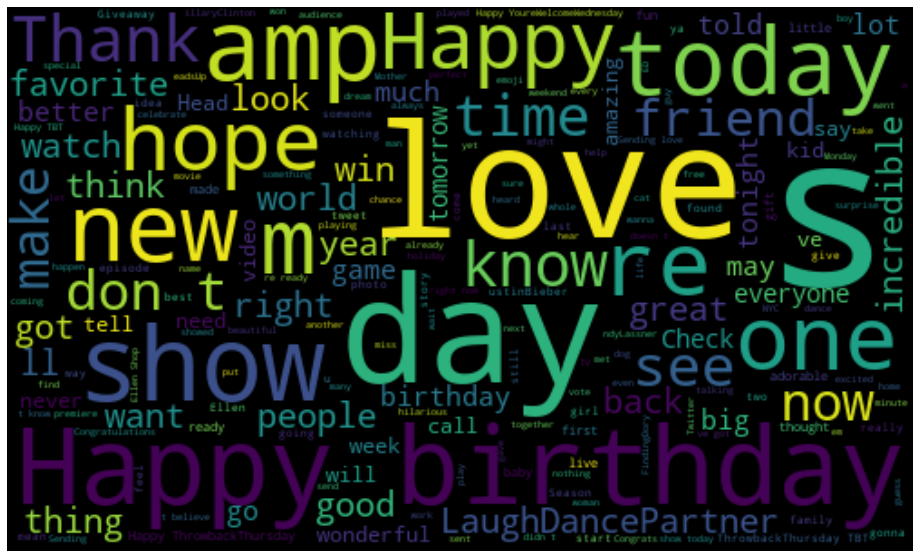

In [83]:
plotWordCloud('TheEllenShow')

In [84]:
def getSentimentAnalysis(value):
    if value<0:
        return 'Negative'
    elif value==0:
        return 'Neutral'
    else:
        return 'Positive'

In [85]:
for i,key in enumerate(user_dataframes):
    user_dataframes[key]['Analysis']=user_dataframes[key].Polarity.apply(getSentimentAnalysis)
    


In [116]:
ellen_df=user_dataframes['TheEllenShow']
twitter=user_dataframes['Twitter']

In [94]:
pos=ellen_df[ellen_df.Analysis=='Positive']
neg=ellen_df[ellen_df.Analysis=='Negative']
neu=ellen_df[ellen_df.Analysis=='Neutral']


In [111]:
neg.content.to_list()

["Today I met a cup holder that's not safe for daytime TV. ",
 'It’s been raining for 3 days in L.A. I put out some jars in case there’s another drought. We don’t want to get into that mess again.',
 '.ctaviaSpencer had a dream to be on a game show. I say "had," because I made it come true. ',
 'Big spoon. Little spoon. ',
 'If you were at the Fort Lauderdale airport or have family affected by this horrific shooting, you’re in our thoughts. Sending love.',
 'Tree lighting is a tough industry, but he’s gonna crack into it. ',
 '2016 was one crazy ride. ',
 'Jim Parsons told me 3 things he would bang in this round of 5 Second Rule.  ',
 'Tonight is my office holiday party! Tomorrow is my awkward office board meeting.',
 'Watching the news from Aleppo, I feel so powerless. If you feel the same, you can support Doctors w/o Borders. SF ',
 'Apparently, one of the McConaughey kids is on the naughty list.  ',
 '.atthewPerry told me an unbelievable story. My apologies to M. Night Shyamalan.  '

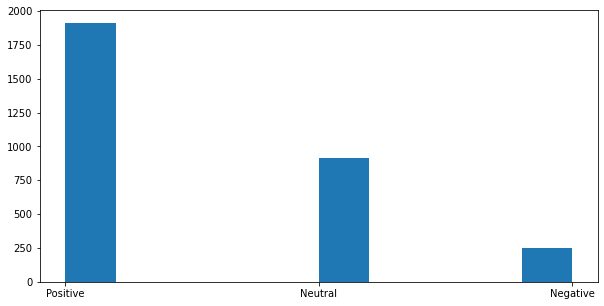

In [115]:
plt.figure(figsize=(10,5))
plt.hist(ellen_df.Analysis)
plt.show()

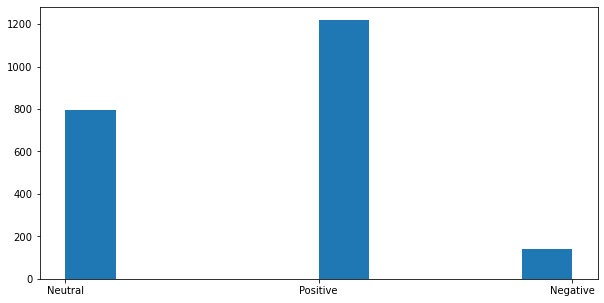

In [117]:
plt.figure(figsize=(10,5))
plt.hist(twitter.Analysis)
plt.show()